In [1]:
#シミュレーション
#測定データが極端におかしくないかの確認用
#測定データや、シミュレーションデータを保存する

In [2]:
#ファイル名など定義
#ファイルごとに違う
############################################
filename = "angel_"
num = 1
number = str(num)

#####
scale = 1.8 # ax[1]の縮尺
N = 100000  # 試行回数
N2 = 1000 #theta2用の細かさ

In [3]:
import pandas as pd
sf = pd.read_csv('angel_data.csv', header=None)

In [4]:
int_time = sf.at[num, 1]
end_time = sf.at[num, 2]
hiduke = str(int_time) + "～" + str(end_time)
time = float(sf.at[num, 3])
toukei = [int(sf.at[num, 8+i]) for i in range(5)]

In [5]:
#シンチのサイズ、位置定義
#ファイルごとに違うパラメータ
#画像表示するなら少しNscinciを減らさないとめっちゃ時間かかる
######################################################
import numpy as np
Nsinci = 4
coin = 5

radius_inner = [6, 7, 0, 0]
radius_outer = [14.95, 11.5, 4, 5]
shiftx = [0]*Nsinci
z = [float(sf.at[num, i+4]) for i in range(Nsinci)]

S = [np.pi*(a**2 - b**2) for a,b in zip(radius_outer, radius_inner)]
slist = [S[2], S[3], S[2], S[3], S[2]]

nbin=90

In [6]:
#リストと変数定義
count_hit = [0]*coin
angles_theta = [[] for _ in range(coin)]
lines = [[] for _ in range(coin)]
count_hit2 = [0]*coin
angles_theta2 = [[] for _ in range(coin)]

thetas2 = []
ss = []

dx = 1.0
dy = 1.0
dz = 1.0
dx2 = 1.0
dy2 = 1.0
dz2 = 1.0

In [7]:
#乱数計算の関数定義
def random_mc(label, r_inner_int, r_outer_int, shiftx_int, r_inner_end, r_outer_end, shiftx_end, zint, zend):

    # int上にランダムに点を生成
    r = np.sqrt(np.random.uniform(r_inner_int**2, r_outer_int**2))
    theta_r = np.random.uniform(0, 2*np.pi)
    x0 = r * np.cos(theta_r) + shiftx_int
    y0 = r * np.sin(theta_r)

    # 直線: r(t) = (x0 + dx*t, y0 + dy*t, z0 + dz*t)
    # z = d となるときの t:
    d = zend-zint
    # cos ver
    ta = d / dz
    xa = x0 + dx * ta
    ya = y0 + dy * ta
    #cos^2 ver
    tb = d / dz2
    xb = x0 + dx2 * tb
    yb = y0 + dy2 * tb
    
    # endの中心からの距離で判定
    if r_inner_end**2 <= (xa-shiftx_end)**2 + (ya)**2 <= r_outer_end**2:
        count_hit[label] += 1
        angles_theta[label].append(np.degrees(theta))
        if len(lines[label]) < 100:
            lines[label].append(((x0, y0, zint), (xa, ya, zend)))
    if r_inner_end**2 <= (xb-shiftx_end)**2 + (yb)**2 <= r_outer_end**2:
        count_hit2[label] += 1
        angles_theta2[label].append(np.degrees(theta2))

In [8]:
#乱数計算
#一部ファイルごとに違う
import numpy as np

for i in range(N2):
    delta = np.pi/2/N2
    theta3 = delta*(2*i+1)/2
    thetas2.append(theta3)
    #si = delta*(np.cos(theta3)**2)
    si = delta*(np.cos(theta3)**2*np.sin(theta3))
    ss.append(si)
ssum = np.sum(ss)
ssi = [x/ssum for x in ss]

d = 0

for _ in range(N):
############################################################
    u = np.random.uniform(0, 1)
    v = np.random.uniform(0, 1)
    phi = 2*np.pi*u # 0〜360度
    theta = np.arccos(v) # 0〜90度（上向き）
    theta2 = np.random.choice(thetas2, p=ssi)

    dx = np.sin(theta) * np.cos(phi)
    dy = np.sin(theta) * np.sin(phi)
    dz = np.cos(theta)

    dx2 = np.sin(theta2) * np.cos(phi)
    dy2 = np.sin(theta2) * np.sin(phi)
    dz2 = np.cos(theta2)
#####################################################
    random_mc(0, radius_inner[2], radius_outer[2], shiftx[0], radius_inner[0], radius_outer[0], shiftx[0], z[2], z[0])
    random_mc(1, radius_inner[3], radius_outer[3], shiftx[0], radius_inner[0], radius_outer[0], shiftx[0], z[3], z[0])
    random_mc(2, radius_inner[2], radius_outer[2], shiftx[0], radius_inner[1], radius_outer[1], shiftx[0], z[2], z[1])
    random_mc(3, radius_inner[3], radius_outer[3], shiftx[0], radius_inner[1], radius_outer[1], shiftx[0], z[3], z[1])
    random_mc(4, radius_inner[2], radius_outer[2], shiftx[0], radius_inner[3], radius_outer[3], shiftx[0], z[2], z[3])

[0.22328, 0.22157, 0.19007, 0.2107, 0.06454]
[0.05989, 0.4489, 0.26462, 0.21205, 0.17286]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]
90


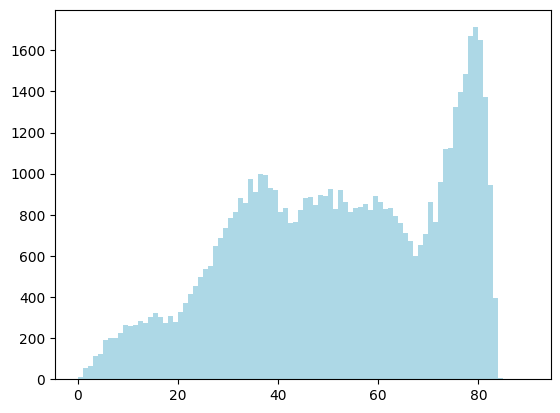

In [9]:
#rate, angel計算
import matplotlib.pyplot as plt
color = 'lightblue'

prob1 = [x/N for x in count_hit]
prob2 = [x/N for x in count_hit2]
# rate = [a*b/150*3 for a,b in zip(prob2, slist)]
rate = [a*b/100*2.485063331 for a,b in zip(prob2, slist)]
flux = [2*np.pi*a*b/10000 for a,b in zip(prob1, slist)]
#1sあたりのミューオンのレートは、100cm^2で2.485063331で確定

print(prob1)
print(prob2)

exp_costheta = [0]*coin
exp_theta = [0]*coin
min_theta = [0]*coin
max_theta = [0]*coin
max_index = [0]*coin
peak_bin_center = [0]*coin
peak_value = [0]*coin
hist_center = [0]*coin
theta_error = [0]*coin

r_mean = [5, 5, 5, 5, 5]

for i in range(coin):
    if len(angles_theta[i]) > 0:
        min_theta[i] = np.min(angles_theta[i])
        max_theta[i] = np.max(angles_theta[i])
        counts, bins, patches = plt.hist(angles_theta[i], range=(0,90), bins=nbin, color=color)
        max_index[i] = np.argmax(counts)
        peak_bin_center[i] = 0.5 * (bins[max_index[i]] + bins[max_index[i]+1])
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        if np.sum(counts) > 0:
            hist_center[i] = np.sum(bin_centers * counts) / np.sum(counts)

            # 全事象数
            total_counts = np.sum(counts)
            # 重心（平均）
            mean = np.sum(bin_centers * counts) / total_counts
            # 分散（不偏分散ではなく母集団分散とする：n ではなく N）
            variance = np.sum(counts * (bin_centers - mean)**2) / total_counts
            # 標準偏差
            std = np.sqrt(variance)
            # 標準誤差（SEM）
            sem = std / np.sqrt(total_counts)
            theta_error[i] = std
        else:
            hist_center[i] = 0
            theta_error[i] = 0
    else:
        min_theta[i] = 0
        max_theta[i] = 0
        max_index[i] = 0
        peak_bin_center[i] = 0
        hist_center[i] = 0

    d = np.abs(z[0]-z[1])
    exp_costheta[i] = d / np.sqrt(((r_mean[i])/2)**2 + d**2)
    exp_theta[i] = np.arccos(exp_costheta[i])
print(bins)
print(nbin)



In [10]:
#シンチの描写関数定義
def draw_annulus(ax, center_x, center_y, z, r_inner, r_outer, color='gray', alpha=0.3, resolution=100):
    theta = np.linspace(0, 2 * np.pi, resolution)
    r = np.linspace(r_inner, r_outer, resolution)
    theta, r = np.meshgrid(theta, r)
    X = center_x + r * np.cos(theta)
    Y = center_y + r * np.sin(theta)
    Z = np.full_like(X, z)
    ax.plot_surface(X, Y, Z, color=color, alpha=alpha, linewidth=0)

f = scale
h = 10
def draw_scinti(label, r_inner, r_outer, d):
    ax.plot([(180+72)/2-r_outer*f, (180+72)/2-r_inner*f], [d*f+h, d*f+h], color = "black", alpha = 0.6, linewidth = 4)
    ax.plot([(180+72)/2+r_outer*f, (180+72)/2+r_inner*f], [d*f+h, d*f+h], color = "black", alpha = 0.6, linewidth = 4)

def draw_2line_left(label, r_inner, r_outer, r, dA, dB):
    ax.plot([(180+72)/2-((r_inner+r_outer))/2*f, (180+72)/2], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.6, linewidth = 4)
    ax.plot([(180+72)/2-(r_outer)*f, (180+72)/2+r*f], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.3)
    ax.plot([(180+72)/2-(r_inner)*f, (180+72)/2-r*f], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.3)

def draw_2line_right(label, r_inner, r_outer, r, dA, dB):
    ax.plot([(180+72)/2+((r_inner+r_outer))/2*f, (180+72)/2], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.6, linewidth = 4)
    ax.plot([(180+72)/2+(r_outer)*f, (180+72)/2-r*f], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.3)
    ax.plot([(180+72)/2+(r_inner)*f, (180+72)/2+r*f], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.3)

def draw_2line_center(label, r_inner, r_outer, r, dA, dB):
    ax.plot([(180+72)/2, (180+72)/2], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.6, linewidth = 4)
    ax.plot([(180+72)/2+(r_outer)*f, (180+72)/2-r*f], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.3)
    ax.plot([(180+72)/2-(r_inner)*f, (180+72)/2+r*f], [dA*f+h, dB*f+h], color=colorlist[label], alpha = 0.3)

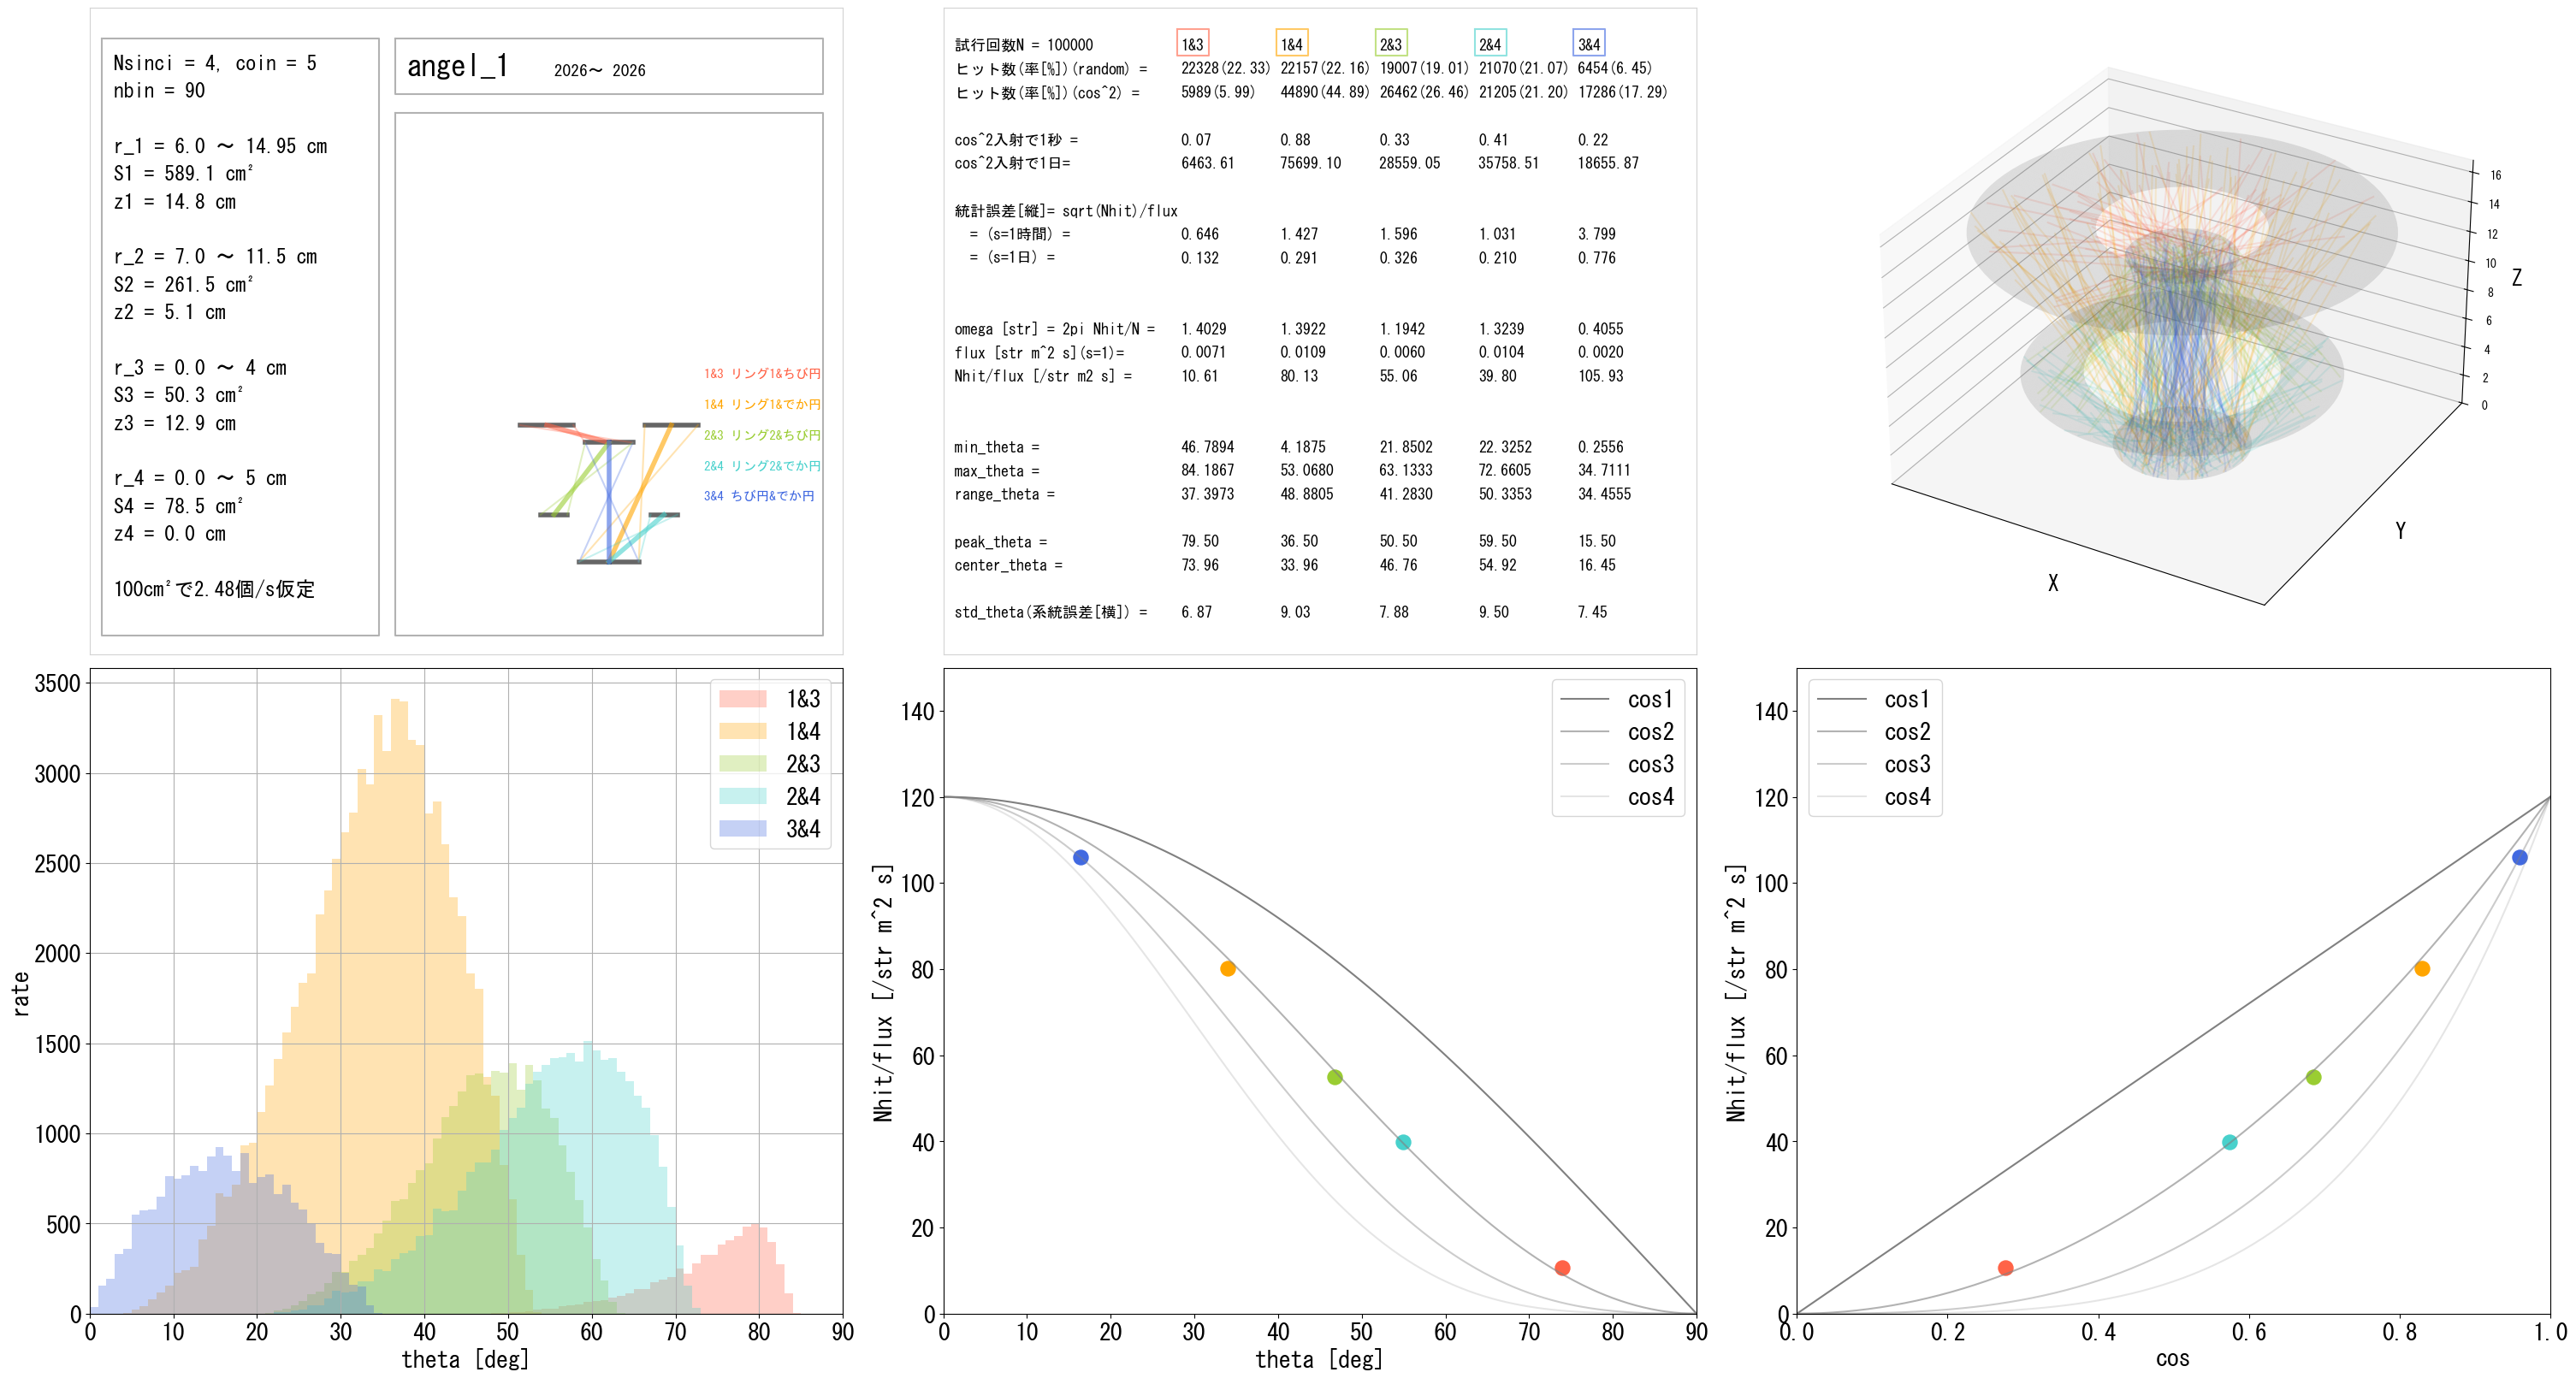

In [11]:
#画像作成
#一部ファイルごとに異なる
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.rcParams['font.family'] = 'MS Gothic'  # or 'Meiryo' MS Gothic
fig = plt.figure(figsize=(30, 16), constrained_layout=True)
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

colorlist = ['tomato', 'orange', 'yellowgreen', 'mediumturquoise', 'royalblue']
#colorlist = ['tomato', 'orange', 'yellowgreen', 'forestgreen', 'mediumturquoise', 'deepskyblue', 'royalblue', 'blueviolet', 'mediumvioletred']
labellist = ['1&3', '1&4', '2&3', '2&4', '3&4']
labellist2 = ['1&3 リング1&ちび円', '1&4 リング1&でか円', '2&3 リング2&ちび円', '2&4 リング2&でか円', '3&4 ちび円&でか円']

# cmap = plt.get_cmap('rainbow')  # 'hsv', 'nipy_spectral' などもOK
# colorlist = [cmap((coin-i) / coin) for i in range(coin)]
# labellist = [f'0&{i+1}' for i in range(coin)]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# --- 画像1: パラメータ表示 ---
fs = 17
ax = ax1
ax.plot([0, 100], [0, 100], color="white")

yoko = 1.0
ax.plot([-2, 68, 68, -2, -2], [95, 95, -2, -2, 95], color="gray", alpha=0.6)
textlist = [f"Nsinci = {Nsinci:.0f}, coin = {coin:.0f}", f"nbin = {nbin:.0f}",
            " ", f"r_1 = {radius_inner[0]:.1f} ～ {radius_outer[0]} cm", f"S1 = {np.pi*(radius_outer[0]**2 - radius_inner[0]**2):.1f} cm²", f"z1 = {z[0]:.1f} cm",
            " ", f"r_2 = {radius_inner[1]:.1f} ～ {radius_outer[1]} cm", f"S2 = {np.pi*(radius_outer[1]**2 - radius_inner[1]**2):.1f} cm²", f"z2 = {z[1]:.1f} cm",
            " ", f"r_3 = {radius_inner[2]:.1f} ～ {radius_outer[2]} cm", f"S3 = {np.pi*(radius_outer[2]**2 - radius_inner[2]**2):.1f} cm²", f"z3 = {z[2]:.1f} cm",
            " ", f"r_4 = {radius_inner[3]:.1f} ～ {radius_outer[3]} cm", f"S4 = {np.pi*(radius_outer[3]**2 - radius_inner[3]**2):.1f} cm²", f"z4 = {z[3]:.1f} cm",
            " ", "100cm²で2.48個/s仮定"]
for i in range(len(textlist)):
    ax.text(yoko, 90-4.5*i, textlist[i], fontsize=fs)

yoko = 75
ax.plot([72, 180, 180, 72, 72], [95, 95, 86, 86, 95], color="gray", alpha=0.6)
ax.text(yoko, 89, filename + number, fontsize=25)
ax.text(yoko+35, 89, hiduke, fontsize=14)


ax.set_xlim(-5,185)
ax.set_ylim(0,100)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_color('lightgray')


ax.plot([72, 180, 180, 72, 72], [83, 83, -2, -2, 83], color="gray", alpha=0.6)
f = 1.5
h = 10
#シンチ
draw_scinti(1, radius_inner[0], radius_outer[0], z[0])
draw_scinti(2, radius_inner[1], radius_outer[1], z[1])
draw_scinti(3, radius_inner[2], radius_outer[2], z[2])
draw_scinti(4, radius_inner[3], radius_outer[3], z[3])
#line
draw_2line_left(0, radius_inner[0], radius_outer[0], radius_outer[2], z[0], z[2])
draw_2line_right(1, radius_inner[0], radius_outer[0], radius_outer[3], z[0], z[3])
draw_2line_left(2, radius_inner[1], radius_outer[1], radius_outer[2], z[1], z[2])
draw_2line_right(3, radius_inner[1], radius_outer[1], radius_outer[3], z[1], z[3])
draw_2line_center(4, radius_outer[2], radius_outer[2], radius_outer[3], z[2], z[3])
#label
yoko = 150
for i in range(5):
    ax.text(yoko, 40-5*i, labellist2[i], fontsize=11, color=colorlist[i])
#もしシンチの位置のせいでここに被ったら変える


ax.set_xlim(-5,185)
ax.set_ylim(-5,100)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_color('lightgray')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# --- 画像2: パラメータ表示 ---
fs = 13
ax = ax2
ax.plot([0, 100], [0, 100], color="white")

yoko = -2
textlist = [f"試行回数N = {N:.0f}", "ヒット数(率[%])(random) =", "ヒット数(率[%])(cos^2) =", 
            " ", "cos^2入射で1秒 =", "cos^2入射で1日= ", 
            " ", "統計誤差[縦]= sqrt(Nhit)/flux ", "  = (s=1時間) =", "  = (s=1日) =", 
            " ",
            " ", "omega [str] = 2pi Nhit/N =", "flux [str m^2 s](s=1)=", "Nhit/flux [/str m2 s] =", 
            " ",
            " ", "min_theta =", "max_theta =", "range_theta =",
            " ", "peak_theta =", "center_theta =", 
            " ", "std_theta(系統誤差[横]) ="] 
for i in range(len(textlist)):
    ax.text(yoko, 95-4.5*i, textlist[i], fontsize=fs)

for i in range(5):
    yoko = 55+25*i
    ax.plot([yoko-1, yoko+7, yoko+7, yoko-1, yoko-1], [99, 99, 94, 94, 99], color=colorlist[i], alpha=0.6)
    valuelist = [labellist[i], f"{count_hit[i]:.0f}({prob1[i]*100:.2f})", f"{count_hit2[i]:.0f}({prob2[i]*100:.2f})", 
                " ", f"{rate[i]:.2f}", f"{rate[i]*3600*24:.2f} ", 
                " ", " ", f"{np.sqrt(rate[i]*3600)/(flux[i]*3600):.3f}", f"{np.sqrt(rate[i]*3600*24)/(flux[i]*3600*24):.3f}", 
                " ",
                " ", f"{2*np.pi*prob1[i]:.4f}", f"{flux[i]:.4f}", f"{rate[i]/(flux[i]):.2f}", 
                " ",
                " ", f"{min_theta[i]:.4f}", f"{max_theta[i]:.4f}", f"{max_theta[i]-min_theta[i]:.4f}", 
                " ", f"{peak_bin_center[i]:.2f}", f"{hist_center[i]:.2f}",
                " ", f"{theta_error[i]:.2f}"]
    for j in range(len(textlist)):
        ax.text(yoko, 95-4.5*j, valuelist[j], fontsize=fs)


ax.set_xlim(-5,185)
ax.set_ylim(-20,103)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_color('lightgray')   

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# --- 画像3: 3D可視化 --- 縮尺変えていい
ax = ax3
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_color('white')

for i in range(4):
    draw_annulus(ax, center_x=shiftx[i], center_y=0, z=z[i], r_inner=radius_inner[i], r_outer=radius_outer[i], color='gray', alpha=0.15)

for i in range(coin): 
    for (p1, p2) in lines[i]:
        xs, ys, zs = zip(p1, p2)
        ax.plot(xs, ys, zs, color = colorlist[i], alpha=0.15)

ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)
ax.set_zlabel("Z", fontsize=18)

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(0, np.max(z)+2)
ax.set_box_aspect([3, 3, 2])  # X:Y:Z = 1:1:2 の比率
# ax.set_position([0.4, 0, 0.7, 0.5])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# --- 画像4: θのヒストグラム ---
ax = ax4
for i in range(coin):
    weights = np.ones_like(angles_theta[i])*rate[i]*3600*24/count_hit[i]
    ax.hist(angles_theta[i], range = (0,90), bins=nbin, weights=weights, color=colorlist[i], alpha = 0.3, label=labellist[i])
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("rate", fontsize=20)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=20)
ax.set_xlim(0, 90)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
yoko = [x for x in hist_center]
yoko2 = [np.cos(x/180*np.pi) for x in hist_center]
tate = [a/b for a,b in zip(rate, flux)]
# tate2 = [x/16464*150 for x in count_hit2]
# tate1 = [a/b*10000 for a,b in zip(rate, slist)]
tate_error_600 = [np.sqrt(a*600)/(b*600) for a,b in zip(rate, flux)]
tate_error_3600 = [np.sqrt(a*3600)/(b*3600) for a,b in zip(rate, flux)]
yoko_error = [x for x in theta_error]
yoko_error2 = [abs((np.cos((x+y)/180*np.pi) + np.cos((x-y)/180*np.pi) - 2*np.cos(x/180*np.pi) )/2) for x,y in zip(yoko, yoko_error)]


theta = np.linspace(0, 90, 100)
cos = [np.cos(x/180*np.pi) for x in theta]
peak0 = 120
cos1 = [peak0*np.cos(x/180*np.pi) for x in theta ]
cos2 = [peak0*np.cos(x/180*np.pi)**2 for x in theta ]
cos3 = [peak0*np.cos(x/180*np.pi)**3 for x in theta ]
cos4 = [peak0*np.cos(x/180*np.pi)**4 for x in theta ]

ax = ax5
for i in range(len(yoko)):
    ax.scatter(yoko[i], tate[i], color=colorlist[i], alpha=1.0, s=150)
ax.plot(theta, cos1, label ="cos1", color = 'gray', alpha=1.0)
ax.plot(theta, cos2, label="cos2", color = 'gray', alpha=0.6)
ax.plot(theta, cos3, label="cos3", color = 'gray', alpha=0.4)
ax.plot(theta, cos4, label="cos4", color = 'gray', alpha=0.2)
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("Nhit/flux [/str m^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,90)
ax.set_ylim(0,150)
ax.legend(fontsize=20)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

ax = ax6
for i in range(len(yoko2)):
    ax.scatter(yoko2[i], tate[i], color=colorlist[i], alpha=1.0, s=150)
ax.plot(cos, cos1, label="cos1", color = 'gray', alpha=1.0)
ax.plot(cos, cos2, label="cos2", color = 'gray', alpha=0.6)
ax.plot(cos, cos3, label="cos3", color = 'gray', alpha=0.4)
ax.plot(cos, cos4, label="cos4", color = 'gray', alpha=0.2)
ax.set_xlabel("cos", fontsize=20)
ax.set_ylabel("Nhit/flux [/str m^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,1)
ax.set_ylim(0,150)
ax.legend(fontsize=20)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# plt.tight_layout()
fig.savefig("./pic/angel_sim/" + filename + number + "_sim.png", dpi=300)  # 画像を保存
plt.show()

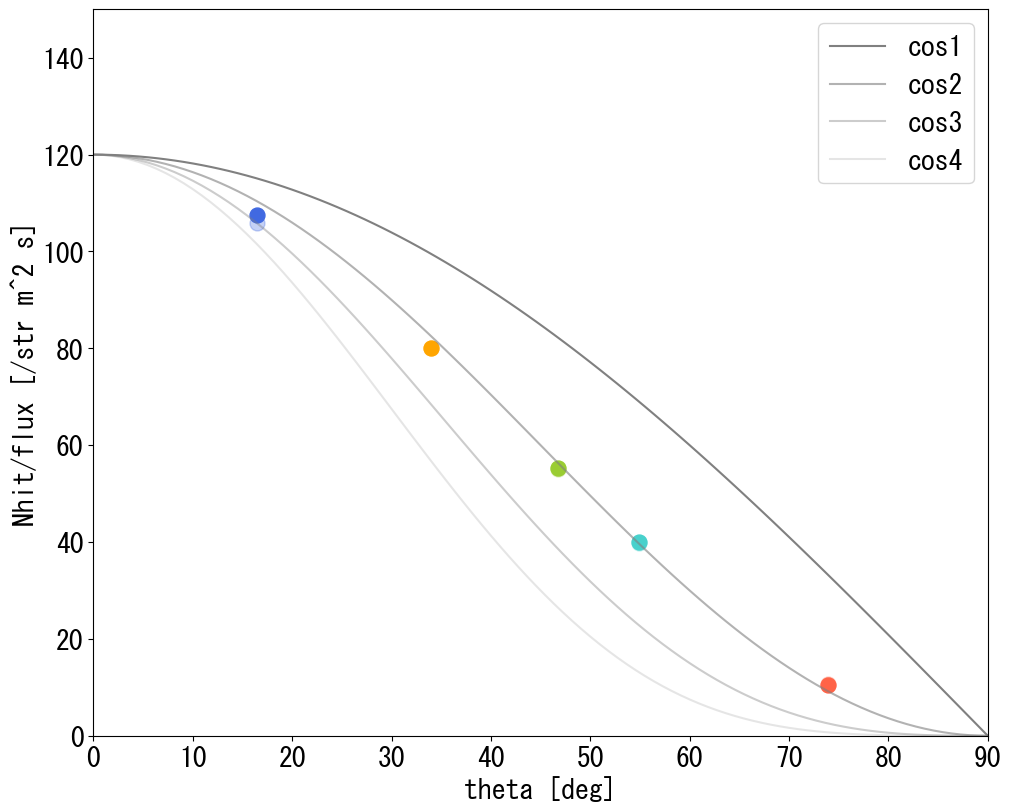

In [ ]:
#画像作成
#一部ファイルごとに異なる
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

colorlist = ['tomato', 'orange', 'yellowgreen', 'mediumturquoise', 'royalblue']

plt.rcParams['font.family'] = 'MS Gothic'  # or 'Meiryo' MS Gothic
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax5 = fig.add_subplot(1, 1, 1)


# eff = [1, 1, 1, 1, 1]
eff = [0.6690069473, 0.7109177307, 0.758738267, 0.806270382, 0.7816460968]


toukei_rate = [x/time for x in toukei]
toukei_tate = [a/b/c for a,b,c in zip(toukei_rate, flux, eff)]
toukei_error = [np.sqrt(x*time)/(y*time*z) for x,y,z in zip(toukei_rate, flux, eff)]

keisuu = 1 
yoko = [x for x in hist_center]
tate = [a/b for a,b in zip(rate, flux)]
tate_error_60 = [np.sqrt(a*60)/(b*60) for a,b in zip(rate, flux)]
tate_error_3600 = [np.sqrt(a*3600)/(b*3600) for a,b in zip(rate, flux)]
yoko_error = [x for x in theta_error]


theta = np.linspace(0, 90, 100)
peak0 = 120
cos1 = [peak0*np.cos(x/180*np.pi) for x in theta ]
cos2 = [peak0*np.cos(x/180*np.pi)**2 for x in theta ]
cos3 = [peak0*np.cos(x/180*np.pi)**3 for x in theta ]
cos4 = [peak0*np.cos(x/180*np.pi)**4 for x in theta ]


ax = ax5
for i in range(len(yoko)):
    if toukei_rate[i] > 0:
        ax.scatter(yoko[i], tate[i], color=colorlist[i], alpha=0.3, s=115)
        ax.scatter(yoko[i], toukei_tate[i], color=colorlist[i], alpha=1.0, s=115)
        # ax.errorbar(yoko[i], toukei_tate[i], xerr=yoko_error[i], yerr=toukei_error[i], fmt='o', color=colorlist[i], alpha=0.6, capsize=6)
ax.plot(theta, cos1, label ="cos1", color = 'gray', alpha=1.0)
ax.plot(theta, cos2, label="cos2", color = 'gray', alpha=0.6)
ax.plot(theta, cos3, label="cos3", color = 'gray', alpha=0.4)
ax.plot(theta, cos4, label="cos4", color = 'gray', alpha=0.2)
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("Nhit/flux [/str m^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,90)
ax.set_ylim(0,150)
ax.legend(fontsize=20)

fig.savefig("./pic/angel_sim/" + filename + number + "_kakunin.png", dpi=300)  # 画像を保存
plt.show()

In [15]:
import pandas as pd
df = pd.read_csv('curve_plot.csv', header=None)

data = [x for x in toukei]
rate = [x for x in rate]
flux = [x for x in flux]
theta = [x for x in hist_center]

df.at[num, 0] = num
df.at[num, 1] = time
for i in range(5):
    df.at[num, i+2] = data[i]
for i in range(5):
    df.at[num, i+7] = rate[i]
for i in range(5):
    df.at[num, i+12] = flux[i]
for i in range(5):
    df.at[num, i+17] = theta[i]

# 保存
df.to_csv('curve_plot.csv', index=False, header=False)